# Read Results

In [2]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model_2_name = {
    'literaledistmult': 'LiteralE$_{DistMult}$',
    'literalecomplex': 'LiteralE$_{ComplEx}$',
    'kbln': 'KBLN',
    'multitask': 'MTKGNN',
    'transea': 'TransEA'
}

dataset_2_name = {
    'fb15k-237': 'FB15k-237',
    'yago3-10': 'YAGO3-10',
    'litwd48k': 'LitWD48k'
}

In [4]:
def extract_test_scores(result_file_path):
    MRR = None
    MR = None
    Hits_at_10 = None
    Hits_at_3 = None
    Hits_at_1 = None

    with open(result_file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'transea' in result_file_path.lower():
                if line.startswith('Test MR'):
                    MR, MRR, Hits_at_10, Hits_at_3, Hits_at_1 = [float(score.replace(': ', '')) for score in re.findall(": \d.\d.\d*", line)]

            else:
                if 'Mean reciprocal rank:' in line:
                    MRR = float(re.findall(": \d.\d*", line)[0].replace(': ', ''))
                if 'Mean rank:' in line:
                    MR = float(re.findall(": \d.\d*", line)[0].replace(': ', ''))
                if 'Hits @10:' in line:
                    Hits_at_10 = float(re.findall(": \d.\d*", line)[0].replace(': ', ''))
                if 'Hits @3:' in line:
                    Hits_at_3 = float(re.findall(": \d.\d*", line)[0].replace(': ', ''))
                if 'Hits @1:' in line:
                    Hits_at_1 = float(re.findall(": \d.\d*", line)[0].replace(': ', ''))

    return {'MRR': MRR, 'MR': MR, 'Hits@10': Hits_at_10, 'Hits@3': Hits_at_3, 'Hits@1': Hits_at_1}

In [5]:
NUM_RUNS = 3

result_files = {}

for i in range(1, NUM_RUNS + 1):
    if not os.path.exists(f'data/results/results_run_{i}'):
        print(f'Run {i} does not exist')
    else:
        for result_file in os.listdir(f'data/results/results_run_{i}'):
            if result_file.startswith('slurm_'):
                if result_file not in result_files:
                    result_files[result_file] = []
                result_files[result_file].append(extract_test_scores(f'data/results/results_run_{i}/{result_file}'))


Run 3 does not exist


In [6]:
result_files

{'slurm_multitask_fb15k-237_org_40.txt': [{'MRR': 0.21584752099915835,
   'MR': 999.0,
   'Hits@10': 0.3563040487421384,
   'Hits@3': 0.23693003144654087,
   'Hits@1': 0.14676690251572327},
  {'MRR': 0.2176599717481244,
   'MR': 991.0,
   'Hits@10': 0.35846599842767296,
   'Hits@3': 0.2397061713836478,
   'Hits@1': 0.14789701257861634}],
 'slurm_literaledistmult_yago3-10_org.txt': [{'MRR': 0.47608747361001535,
   'MR': 1835.0,
   'Hits@10': 0.6240985576923077,
   'Hits@3': 0.5209334935897436,
   'Hits@1': 0.3952323717948718},
  {'MRR': 0.4834928902720518,
   'MR': 1875.0,
   'Hits@10': 0.6268028846153846,
   'Hits@3': 0.5278445512820513,
   'Hits@1': 0.4055488782051282}],
 'slurm_multitask_fb15k-237_org_80.txt': [{'MRR': 0.09392577804939631,
   'MR': 2380.0,
   'Hits@10': 0.19494398584905662,
   'Hits@3': 0.10200471698113207,
   'Hits@1': 0.046285377358490566},
  {'MRR': 0.09198083601112729,
   'MR': 2397.0,
   'Hits@10': 0.1928311713836478,
   'Hits@3': 0.0998181996855346,
   'Hits@1'

# Plots
### Numerical feature ablation: original literal feature vs. random features -> org_vs_rand_fig.pdf


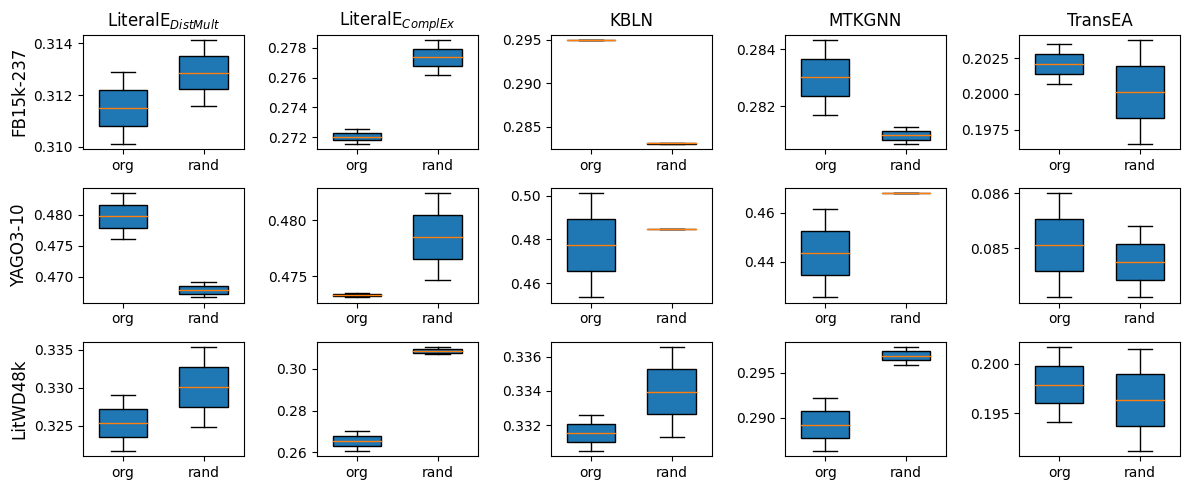

In [7]:
fig, axs = plt.subplots(3, 5, figsize=(12, 5))

for j, dataset in enumerate(['fb15k-237', 'yago3-10', 'litwd48k']):
    for i, model in enumerate(['literaledistmult', 'literalecomplex', 'kbln', 'multitask', 'transea']):
        for feature_type in ['org', 'rand']:
            MRR = [result['MRR'] for result in result_files[f'slurm_{model}_{dataset}_{feature_type}.txt']]
            axs[j, i].boxplot(MRR, positions=[0 if feature_type == 'org' else 1], widths=0.6, patch_artist=True, showfliers=False)

            axs[j, i].set_xticks([0, 1])
            axs[j, i].set_xticklabels(['org', 'rand'])

for ax, col in zip(axs[0], model_2_name.values()):
    ax.set_title(col)

for ax, row in zip(axs[:,0], ['FB15k-237', 'YAGO3-10', 'LitWD48k']):
    ax.set_ylabel(row, rotation=90, size='large')

plt.tight_layout()
plt.savefig('data/tex/org_vs_rand_fig.pdf')
plt.show()

### Relational feature ablation -> rel_abl_fig.pdf


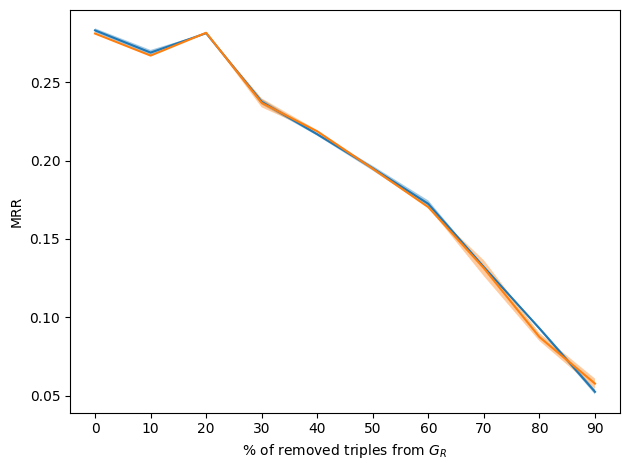

In [8]:
run_name = 'slurm_multitask_fb15k-237'



mrr_org = [result_files[f'{run_name}_org.txt'][0]['MRR']] + [result['MRR'] for result in [result_files[f'{run_name}_org_{percent}.txt'][0] for percent in ['10', '20', '30', '40', '50', '60', '70', '80', '90']]]
mrr_rand = [result_files[f'{run_name}_rand.txt'][0]['MRR']] + [result['MRR'] for result in [result_files[f'{run_name}_rand_{percent}.txt'][0] for percent in ['10', '20', '30', '40', '50', '60', '70', '80', '90']]]
x = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90']


def get_mean_std_ablation(run_name, t='org'):
    mrr = []
    for i in range(len(result_files[f'{run_name}_{t}.txt'])):
        mrr.append([result_files[f'{run_name}_{t}.txt'][i]['MRR']] + [result['MRR'] for result in [result_files[f'{run_name}_{t}_{percent}.txt'][i] for percent in ['10', '20', '30', '40', '50', '60', '70', '80', '90']]])
    mrr = np.array(mrr)
    mean = np.mean(mrr, axis=0)
    std = np.std(mrr, axis=0)
    return mean, std


mrr_mean_org, mrr_std_org = get_mean_std_ablation(run_name, t='org')
mrr_mean_rand, mrr_std_rand = get_mean_std_ablation(run_name, t='rand')

plt.plot(x, mrr_mean_org, '-')
plt.plot(x, mrr_mean_rand, '-')

plt.fill_between(x, mrr_mean_org-mrr_std_org, mrr_mean_org+mrr_std_org, alpha=0.4)
plt.fill_between(x, mrr_mean_rand-mrr_std_rand, mrr_mean_rand+mrr_std_rand, alpha=0.4)

plt.ylabel('MRR')
plt.xlabel('% of removed triples from $G_R$')

plt.tight_layout()
plt.savefig('data/tex/rel_abl_fig.pdf')
plt.show()

# Tables

### Numerical feature ablation: original literal feature vs. random features -> org_vs_rand_tab.tex

In [9]:
out_file = open('data/tex/org_vs_rand_tab.tex', 'w')

head = """
\\begin{table}[]
\setlength{\\tabcolsep}{6pt}
\\renewcommand{\\arraystretch}{1.1}

\caption{Numerical feature ablation: original literal feature vs. random features}
\\label{tab:org_vs_rand}
\\begin{center}
\\begin{tabular}{l|rll|rll}

\hline
      & \multicolumn{3}{c|}{\\textbf{original features}} & \multicolumn{3}{c}{\\textbf{random features}} \\\\
\\textbf{model}      & \\textbf{MR} & \\textbf{MRR} & \\textbf{Hits@1} & \\textbf{MR}  & \\textbf{MRR} & \\textbf{Hits@1} \\\\ \hline
"""

tail = """
\hline
\end{tabular}
\end{center}
\end{table}
"""

out_file.write(head + '\n')

for dataset in ['fb15k-237', 'yago3-10', 'litwd48k']:
    out_file.write(f'\hline \multicolumn{{7}}{{c}}{{\\textbf{{{dataset_2_name[dataset]}}}}} \\\\ \\hline \n')
    for model in model_2_name.keys():
        line_string = model_2_name[model]
        for feature_type in ['org', 'rand']:
            for metric in ['MR', 'MRR', 'Hits@1']:
                if metric == 'MR':
                    mean = f'{np.mean([result[metric] for result in result_files[f"slurm_{model}_{dataset}_{feature_type}.txt"]]):.0f}'
                    std = f'{np.std([result[metric] for result in result_files[f"slurm_{model}_{dataset}_{feature_type}.txt"]]):.0f}'.zfill(3)
                else:
                    mean = f'{np.mean([result[metric] for result in result_files[f"slurm_{model}_{dataset}_{feature_type}.txt"]]):.3f}'[1:]
                    std = f'{np.std([result[metric] for result in result_files[f"slurm_{model}_{dataset}_{feature_type}.txt"]]):.3f}'[1:]
                line_string += f'& ${mean}{{\scriptstyle \pm {std}}}$ '
        #print(line_string)
        out_file.write(line_string + ' \\\\ \n')

out_file.write(tail)
out_file.close()

### Feature Variations -> feat_var_tab.tex

In [10]:
out_file = open('data/tex/variations_tab.tex', 'w')

head = """
\\begin{table}[]
\setlength{\\tabcolsep}{6pt}
\\renewcommand{\\arraystretch}{1.1}

\caption{Comparison of different features derived from the original numerical features for FB15k-237.}
\\begin{center}

\\begin{tabular}{l|lllll}
\hline
\multicolumn{1}{l|}{\\textbf{features}} & \\textbf{MR} & \\textbf{MRR} & \\textbf{Hits@1} & \\textbf{Hits@3} & \\textbf{Hits@10} \\\\
"""


tail = """
\hline
\end{tabular}
\end{center}
\end{table}
"""

feature_variante_2_label = {
    'org': 'original',
    'rand': 'random',
    'zeros': 'zeros',
    'attr': 'relation type',
    'filtered-100': 'filtered'
}


out_file.write(head)

for model in ['literalecomplex', 'kbln']:
    out_file.write(f'\hline \multicolumn{{6}}{{c}}{{\\textbf{{{model_2_name[model]}}}}} \\\\ \hline \n')

    for feature_variante in ['org', 'rand', 'zeros', 'attr', 'filtered-100']:
        file_name = f'slurm_{model}_fb15k-237_{feature_variante}.txt'

        line_string = f'{feature_variante_2_label[feature_variante]} '

        for metric in ['MR', 'MRR', 'Hits@1', 'Hits@3', 'Hits@10']:
            if metric == 'MR':
                mean = f'{np.mean([result[metric] for result in result_files[file_name]]):.0f}'
                std = f'{np.std([result[metric] for result in result_files[file_name]]):.0f}'.zfill(3)
            else:
                mean = f'{np.mean([result[metric] for result in result_files[file_name]]):.3f}'[1:]
                std = f'{np.std([result[metric] for result in result_files[file_name]]):.3f}'[1:]
            line_string += f'& ${mean}{{\scriptstyle \pm {std}}}$ '
        out_file.write(line_string + '\\\\ \n')

out_file.write(tail)

47

### Dataset statistics

Entities without numerical literals

In [16]:
for dataset in ['FB15k-237', 'YAGO3-10', 'LitWD48K', 'Synthetic']:
    entities_relational_triples = set()
    for split in ['train', 'valid', 'test']:
        with open(f'data/{dataset.lower()}/{split}.txt', 'r') as f:
            lines = f.readlines()

            for line in lines:
                head, rel, tail = line.strip().split('\t')
                entities_relational_triples.add(head)
                entities_relational_triples.add(tail)

    entities_attributive_triples = set()
    m = '_decimal' if dataset == 'LitWD48K' else ''
    with open(f'data/{dataset}/literals/numerical_literals{m}.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            entity, attr, value = line.strip().split('\t')
            entities_attributive_triples.add(entity)
    print(dataset, ':', len(entities_relational_triples) - len(entities_attributive_triples))


FB15k-237 : 4600
YAGO3-10 : 31030
LitWD48K : 8198
Synthetic : 38
